In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN, GRU, LSTM

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


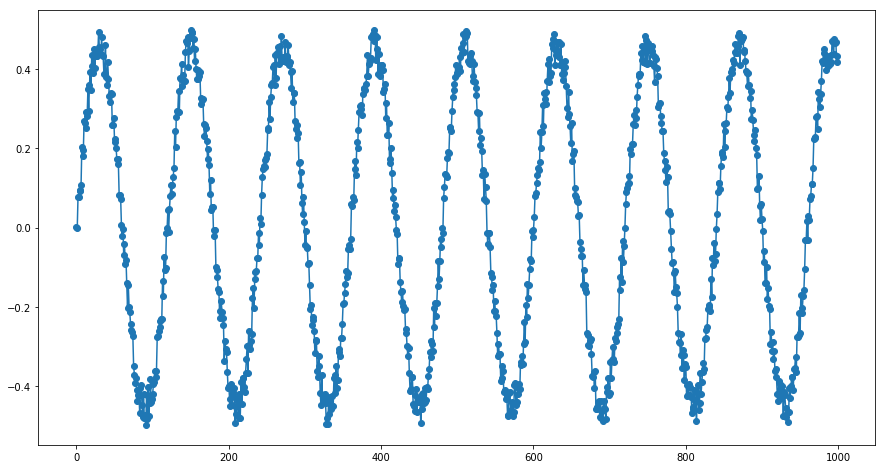

In [0]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)
  
def cos(x, T=100):
    return np.cos(2.0 * np.pi * x / T)

train_size = 5120
test_size = 256
time_offset = 15

# sin波にノイズを付与する
def toy_problem():
    t = train_size + test_size + time_offset
    x = np.arange(0, 1 * t + 1, 1)
    noise = np.random.uniform(low=-0.1, high=0.1, size=len(x))
    return (sin(x/1.2) + noise) / 2.2

f = toy_problem()
plt.figure(figsize=(15,8))
plt.plot(f[:1000], marker='o')

In [0]:
len_sequences = 1

def make_dataset(raw_data, maxlen=1):

    data, target = [], []

    for i in range(len(raw_data)-maxlen-time_offset):
        data.append(raw_data[i:i + maxlen])
        target.append(raw_data[i + time_offset + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    from sklearn.model_selection import train_test_split
    return train_test_split(re_data, re_target, train_size=train_size, test_size=test_size, shuffle=False)
    
    return re_data, re_target



In [0]:
n_epochs = 10
batch_size = 16

In [0]:
x_train, x_test, y_train, y_test = make_dataset(f, len_sequences)

y_train = y_train.reshape(-1,1,1)
y_test = y_test.reshape(-1,1,1)

print(x_train.shape, y_train.shape)
print(x_train[0], y_train[0])

(5120, 1, 1) (5120, 1, 1)
[[0.00124304]] [[0.2946406]]
